# Importing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import cv2
import time

sns.set()

### Product Class dataframe 

In [2]:
product_class = pd.read_csv('./datasets/product_class.csv', sep = ';')
product_class.drop('target', axis = 1, inplace = True) 
display(product_class)

,prdtypecode,prodtype
0,10,livres_adulte
1,40,jeux_videos_import
2,50,accessoires_jeux_videos
3,60,jeux_et_consoles_retro
4,1140,goodies_geek
5,1160,cartes_a_jouer
6,1180,figurines_wargames
7,1280,jouets_enfance
8,1281,jeux_societe
9,1300,modeles_reduits_ou_telecommandes


### Load preprocessed image dataset:
* cropped & resized images
* vectorized images
* computed mean RGB values: $\overline{R}_{img}$, $\overline{G}_{img}$, $\overline{B}_{img}$

In [215]:
### test recover df from pickle
read_df_meanRGBs = True
filename = 'df_vectorized_images_meanRGBs' + '.pkl'

t0 = time.time()

if read_df_meanRGBs:
    df_images = pd.read_pickle(filename)

    display(df_images.head())
    print(df_images.shape)

print("Total time to read = %0.2f seconds" %(time.time()-t0))    

,prdtypecode,productid,imageid,meanR,meanG,meanB,px_0,px_1,px_2,px_3,...,px_29990,px_29991,px_29992,px_29993,px_29994,px_29995,px_29996,px_29997,px_29998,px_29999
0,10,3804725264,1263597046,205.4529,206.5443,234.1815,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
1,2280,436067568,1008141237,167.7998,172.5678,176.3561,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
2,50,201115110,938777978,251.9491,248.2853,244.1458,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
3,1280,50418756,457047496,76.9653,82.1617,111.9041,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
4,2705,278535884,1077757786,209.4138,198.2848,174.6685,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255


(84916, 30006)
Total time to read = 3.32 seconds


# Modelisation on mean RGB
Things to try:
- [x] decision trees from mean RGB
- [x] random forest from mean RGB
- [ ]  KNN
- [ ]  SVM.SVC


## Mini dataset
Reduce the size of the dataset for an intial try.  
Keep 10% of it.

In [198]:
df_images = df_images.iloc[:, :]
print(df_images.shape)
display(df_images.head())

(84916, 30006)


,prdtypecode,productid,imageid,meanR,meanG,meanB,px_0,px_1,px_2,px_3,...,px_29990,px_29991,px_29992,px_29993,px_29994,px_29995,px_29996,px_29997,px_29998,px_29999
0,10,3804725264,1263597046,205.4529,206.5443,234.1815,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
1,2280,436067568,1008141237,167.7998,172.5678,176.3561,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
2,50,201115110,938777978,251.9491,248.2853,244.1458,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
3,1280,50418756,457047496,76.9653,82.1617,111.9041,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
4,2705,278535884,1077757786,209.4138,198.2848,174.6685,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255


## Data target - feature separation

In [82]:
# data_RGB = df_images[['meanR','meanG','meanB']]
# data_pixels = df_images.iloc[:, 6:]

data = df_images.drop(['prdtypecode', 'productid', 'imageid'], axis = 1)
target = df_images['prdtypecode']

print(type(data), type(target))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [83]:
from sklearn.model_selection import train_test_split

data_train, data_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, random_state = 123)

RGB_train = data_train[['meanR','meanG','meanB']]
RGB_test = data_test[['meanR','meanG','meanB']]

Pic_train = data_train.drop(['meanR','meanG','meanB'], axis = 1)
Pic_test = data_test.drop(['meanR','meanG','meanB'], axis = 1)

print(type(data_train), type(y_train))
print(RGB_train.shape, RGB_test.shape)
print(y_train.shape, y_test.shape)
display(Pic_train.head())

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
(67932, 3) (16984, 3)
(67932,) (16984,)


,px_0,px_1,px_2,px_3,px_4,px_5,px_6,px_7,px_8,px_9,...,px_29990,px_29991,px_29992,px_29993,px_29994,px_29995,px_29996,px_29997,px_29998,px_29999
54169,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
1283,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
69362,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
71316,252,254,255,252,254,255,252,254,255,252,...,255,252,254,255,252,254,255,252,254,255
54116,255,255,255,255,255,255,254,254,254,253,...,255,255,255,255,255,255,255,255,255,255


In [113]:
display(RGB_train.head())

,meanR,meanG,meanB
54169,83.1927,83.8641,84.1005
1283,124.9232,154.5037,196.0828
69362,139.0682,170.8269,144.1384
71316,218.8014,220.4065,232.0685
54116,222.1179,215.3254,214.5340


## Decision tree on the mean RGB dataset
- [x] A max_depth >11 is needed to be able to predict all 27 classes.  
- [x] Optimize max_depth & criterion with GridSearch   
- [ ] check other parameters

In [84]:
X_train, X_test = RGB_train, RGB_test

In [85]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

## instantiation
dt_clf = DecisionTreeClassifier(criterion = 'entropy', random_state = 123) # max_depth = 10

## grid model:
params = {'max_depth' : np.arange(1,20,1),
         'criterion' : ['gini', 'entropy']}

grid_dt = GridSearchCV(estimator = dt_clf, param_grid = params, scoring = 'accuracy', n_jobs = -1, verbose = 3)


## training (timed)
t0 = time.time()

#dt_clf.fit(X_train, y_train)
grid_dt.fit(X_train, y_train)

t1 = time.time()
print("For %d observations, training time = %0.2f seconds" %(X_train.shape[0], (t1-t0) ) )

Fitting 5 folds for each of 38 candidates, totalling 190 fits
For 67932 observations, training time = 25.62 seconds


In [102]:
print(grid_dt.best_params_)

dt_grid_optimization = pd.DataFrame.from_dict(grid_dt.cv_results_).loc[:,['params', 'mean_test_score']]
print(dt_grid_optimization)

{'criterion': 'gini', 'max_depth': 12}
                                       params  mean_test_score
0       {'criterion': 'gini', 'max_depth': 1}         0.126067
1       {'criterion': 'gini', 'max_depth': 2}         0.131470
2       {'criterion': 'gini', 'max_depth': 3}         0.136254
3       {'criterion': 'gini', 'max_depth': 4}         0.147736
4       {'criterion': 'gini', 'max_depth': 5}         0.159189
5       {'criterion': 'gini', 'max_depth': 6}         0.161220
6       {'criterion': 'gini', 'max_depth': 7}         0.166475
7       {'criterion': 'gini', 'max_depth': 8}         0.171524
8       {'criterion': 'gini', 'max_depth': 9}         0.174307
9      {'criterion': 'gini', 'max_depth': 10}         0.176382
10     {'criterion': 'gini', 'max_depth': 11}         0.177148
11     {'criterion': 'gini', 'max_depth': 12}         0.178237
12     {'criterion': 'gini', 'max_depth': 13}         0.174645
13     {'criterion': 'gini', 'max_depth': 14}         0.174586
14     {'criteri

In [90]:
## predictions
#y_pred = dt_clf.predict(X_test)
y_pred = grid_dt.predict(X_test)

cm = pd.crosstab(y_test, y_pred, rownames=['Reality'], colnames=['Predictions'])
print(cm.shape)
display(cm)


(27, 27)


Predictions,10,40,50,60,1140,1160,1180,1280,1281,1300,...,2220,2280,2403,2462,2522,2582,2583,2585,2705,2905
Reality,,,,,,,,,,,,,,,,,,,,,
10,53,7,1,0,5,85,0,44,0,14,...,0,58,109,0,31,2,113,0,14,0
40,2,0,2,1,3,80,0,31,0,21,...,0,49,109,0,7,2,110,0,7,0
50,2,0,6,0,0,37,0,19,0,42,...,0,30,33,0,18,1,105,0,2,0
60,2,0,1,0,1,18,0,8,0,22,...,1,16,22,0,1,1,53,0,6,0
1140,3,3,1,3,3,60,0,41,1,50,...,0,63,97,0,18,1,123,1,4,0
1160,8,1,0,1,4,266,0,20,1,5,...,0,77,206,1,13,4,127,3,10,0
1180,3,0,0,0,0,22,0,6,0,9,...,0,16,29,0,1,0,36,1,1,0
1280,9,4,8,3,5,86,1,111,1,82,...,1,70,100,0,57,6,197,4,11,0
1281,5,1,0,1,3,52,0,46,1,26,...,0,38,62,0,23,5,71,4,6,0


**Train - Test accuracy**

In [143]:
dt_accuracy_train = grid_dt.score(X_train, y_train)
dt_accuracy_test = grid_dt.score(X_test, y_test)

print("Train set accuracy %0.3f" %dt_accuracy_train)
print("Test  set accuracy %0.3f" %dt_accuracy_test)

Train set accuracy 0.250
Test  set accuracy 0.185


**Grid evaluation optimization**

In [96]:
dt_grid_optimization.head()

,params,mean_test_score
0,"{'criterion': 'gini', 'max_depth': 1}",0.126067
1,"{'criterion': 'gini', 'max_depth': 2}",0.131470
2,"{'criterion': 'gini', 'max_depth': 3}",0.136254
3,"{'criterion': 'gini', 'max_depth': 4}",0.147736
4,"{'criterion': 'gini', 'max_depth': 5}",0.159189


In [103]:
dt_grid_optimization['criterion'] = [val['criterion'] for val in dt_grid_optimization['params']]
dt_grid_optimization['max_depth'] = [val['max_depth'] for val in dt_grid_optimization['params']]

dt_grid_optimization = dt_grid_optimization.drop('params', axis = 1)

dt_grid_optimization.head()

,mean_test_score,criterion,max_depth
0,0.126067,gini,1
1,0.131470,gini,2
2,0.136254,gini,3
3,0.147736,gini,4
4,0.159189,gini,5


Text(0.5, 1.0, 'Optimization: decision tree on meanRGB')

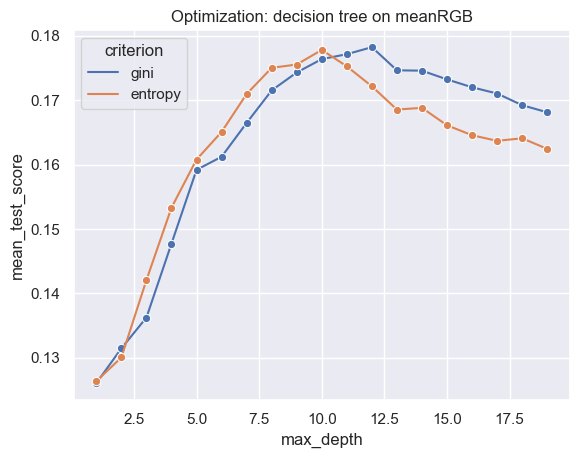

In [111]:
sns.lineplot(x = 'max_depth', y='mean_test_score', data = dt_grid_optimization, hue = 'criterion', marker = 'o' )
plt.title("Optimization: decision tree on meanRGB")

**Classification Report: macro & micro**

In [139]:
from sklearn.metrics import classification_report 

cr = classification_report(y_test, y_pred, output_dict = True)
cr.update({"accuracy": {"precision": None, "recall": None, "f1-score": cr["accuracy"], "support": cr['macro avg']['support']}})

cr_dt = pd.DataFrame(cr).transpose().reset_index().rename(columns={'index': 'prdtypecode'})

micro_dt = cr_dt.iloc[:-3,:]
macro_dt = cr_dt.iloc[-3:,:].rename(columns={'prdtypecode': 'metrics'})
#macro_dt.rename(columns=macro_dt.iloc[0]).drop(macro_dt.index[0])

# display(micro_dt)
# display(macro_dt)

In [140]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          10       0.26      0.09      0.13       601
          40       0.00      0.00      0.00       475
          50       0.09      0.02      0.03       341
          60       0.00      0.00      0.00       176
        1140       0.02      0.01      0.01       552
        1160       0.14      0.34      0.20       791
        1180       0.00      0.00      0.00       139
        1280       0.10      0.12      0.11       944
        1281       0.03      0.00      0.00       415
        1300       0.15      0.17      0.16      1006
        1301       0.25      0.03      0.05       154
        1302       0.09      0.02      0.03       505
        1320       0.14      0.04      0.06       635
        1560       0.13      0.12      0.13       967
        1920       0.10      0.11      0.11       866
        1940       0.23      0.02      0.03       175
        2060       0.21      0.09      0.12      1060
        2220       0.00    

**Best classified cathegories (f1-score)**

In [147]:
micro_cr_dt.sort_values(by = 'f1-score', ascending=False).head()

,prdtypecode,precision,recall,f1-score,support
23,2583,0.291305,0.640587,0.400489,2045.0
21,2522,0.244068,0.290030,0.265071,993.0
19,2403,0.154894,0.371808,0.218684,979.0
5,1160,0.142246,0.336283,0.199925,791.0
9,1300,0.147708,0.172962,0.159341,1006.0


## Random forest on the mean RGB dataset

- [ ] Optimize the number of variables chossen to create Decision Tree's nodes (n)
- [ ] Compare Accuracy_RF_n for various n to find the optimal n
- [ ] Try with some values above and below n=sqrt(nF)!

In [148]:
X_train, X_test = RGB_train, RGB_test

In [154]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

## estimator
rf_clf = RandomForestClassifier(max_features = 3, n_jobs = -1, random_state = 123)

## GridSearch
params = {'n_estimators' : [50,100,150],
         'criterion' : ['gini', 'entropy', 'log_loss'],
         'max_depth' : [2,5,10,15,20]}

grid_rf = GridSearchCV(estimator = rf_clf, param_grid = params, scoring = 'accuracy', n_jobs = -1, verbose = 2)

## training (timed)
t0 = time.time()

#rf_clf.fit(X_train, y_train)
grid_rf.fit(X_train, y_train)

t1 = time.time()
print("For %d observations, training time = %0.2f seconds" %(X_train.shape[0], (t1-t0) ) )

Fitting 5 folds for each of 45 candidates, totalling 225 fits
For 67932 observations, training time = 2217.63 seconds


**Predictions**

In [179]:
#y_pred = rf_clf.predict(X_test)
y_pred = grid_rf.predict(X_test)

cm = pd.crosstab(y_test, y_pred, rownames=['Reality'], colnames=['Predictions'])
print(cm.shape)
display(cm)


(27, 27)


Predictions,10,40,50,60,1140,1160,1180,1280,1281,1300,...,2220,2280,2403,2462,2522,2582,2583,2585,2705,2905
Reality,,,,,,,,,,,,,,,,,,,,,
10,65,7,2,0,4,73,0,24,3,10,...,0,48,109,0,41,2,93,7,18,4
40,11,11,5,1,1,66,0,20,3,22,...,0,46,116,0,4,3,97,2,3,0
50,3,7,10,1,2,12,0,15,1,43,...,0,24,44,1,15,3,108,0,4,0
60,2,1,1,4,3,13,0,7,0,21,...,0,8,29,0,4,0,58,0,5,0
1140,9,9,1,1,3,43,0,23,1,45,...,0,58,125,1,20,0,107,2,5,0
1160,18,7,0,0,5,215,1,19,2,19,...,0,81,235,1,10,5,113,1,3,0
1180,4,3,0,0,2,13,0,3,0,15,...,0,13,36,0,4,0,30,0,2,0
1280,16,9,3,0,8,49,0,116,10,85,...,1,63,119,0,58,4,174,7,8,2
1281,6,8,0,0,2,34,0,48,2,15,...,1,33,81,0,22,1,69,1,6,1


**Train-Test accuracy**

In [156]:
# rf_accuracy_train = rf_clf.score(X_train, y_train)
# rf_accuracy_test = rf_clf.score(X_test, y_test)

rf_accuracy_train = grid_rf.score(X_train, y_train)
rf_accuracy_test = grid_rf.score(X_test, y_test)


print("Train set accuracy %0.3f" % rf_accuracy_train)
print("Test  set accuracy %0.3f" % rf_accuracy_test)

Train set accuracy 0.575
Test  set accuracy 0.219


**Grid optimization evaluation**

In [188]:
print(grid_rf.best_params_)

grid_rf_optimization = pd.DataFrame.from_dict(grid_rf.cv_results_).loc[:,['params', 'mean_test_score']]
print(grid_rf_optimization)

{'criterion': 'gini', 'max_depth': 15, 'n_estimators': 150}
                                               params  mean_test_score
0   {'criterion': 'gini', 'max_depth': 2, 'n_estim...         0.133501
1   {'criterion': 'gini', 'max_depth': 2, 'n_estim...         0.133663
2   {'criterion': 'gini', 'max_depth': 2, 'n_estim...         0.133707
3   {'criterion': 'gini', 'max_depth': 5, 'n_estim...         0.163973
4   {'criterion': 'gini', 'max_depth': 5, 'n_estim...         0.163767
5   {'criterion': 'gini', 'max_depth': 5, 'n_estim...         0.164105
6   {'criterion': 'gini', 'max_depth': 10, 'n_esti...         0.194916
7   {'criterion': 'gini', 'max_depth': 10, 'n_esti...         0.196314
8   {'criterion': 'gini', 'max_depth': 10, 'n_esti...         0.196078
9   {'criterion': 'gini', 'max_depth': 15, 'n_esti...         0.210078
10  {'criterion': 'gini', 'max_depth': 15, 'n_esti...         0.212433
11  {'criterion': 'gini', 'max_depth': 15, 'n_esti...         0.212669
12  {'criterion':

In [189]:
grid_rf_optimization['n_estimators'] = [val['n_estimators'] for val in grid_rf_optimization['params']]
grid_rf_optimization['criterion'] = [val['criterion'] for val in grid_rf_optimization['params']]
grid_rf_optimization['max_depth'] = [val['max_depth'] for val in grid_rf_optimization['params']]

grid_rf_optimization = grid_rf_optimization.drop('params', axis = 1)

grid_rf_optimization.head()

,mean_test_score,n_estimators,criterion,max_depth
0,0.133501,50,gini,2
1,0.133663,100,gini,2
2,0.133707,150,gini,2
3,0.163973,50,gini,5
4,0.163767,100,gini,5


Text(0.5, 1.0, 'Optimization: random forest on meanRGB')

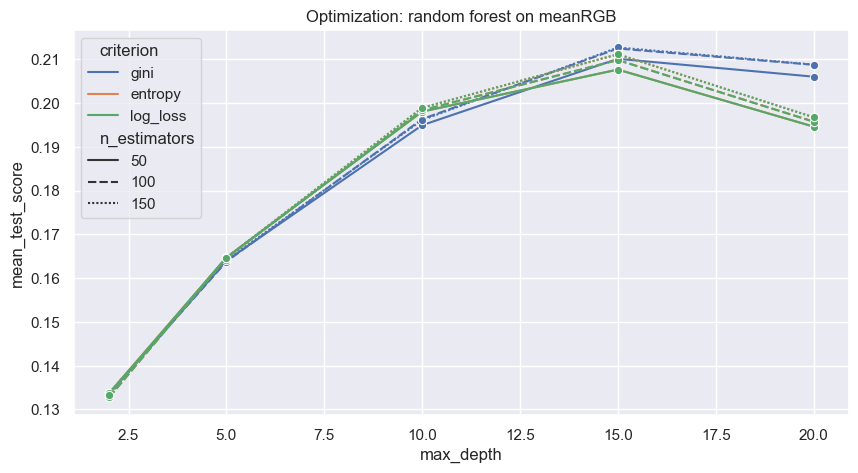

In [190]:
plt.figure(figsize = (10,5))
sns.lineplot(x = 'max_depth', y='mean_test_score', data = grid_rf_optimization, hue = 'criterion', style='n_estimators', marker = 'o')
plt.title("Optimization: random forest on meanRGB")

**Classification Report: macro & micro**

In [195]:
from sklearn.metrics import classification_report 

cr = classification_report(y_test, y_pred, output_dict = True)
cr.update({"accuracy": {"precision": None, "recall": None, "f1-score": cr["accuracy"], "support": cr['macro avg']['support']}})

micro_rf = pd.DataFrame(cr).transpose().reset_index().rename(columns={'index': 'prdtypecode'}).iloc[:-3,:]
macro_rf = pd.DataFrame(cr).transpose().reset_index().rename(columns={'index': 'metrics'}).iloc[-3:,:]

# display(micro_dt)
# display(macro_dt)

,prdtypecode,precision,recall,f1-score,support
0,10,0.201238,0.108153,0.140693,601.0
1,40,0.069182,0.023158,0.034700,475.0
2,50,0.212766,0.029326,0.051546,341.0
3,60,0.363636,0.022727,0.042781,176.0
4,1140,0.033708,0.005435,0.009360,552.0
5,1160,0.159970,0.271808,0.201405,791.0
6,1180,0.000000,0.000000,0.000000,139.0
7,1280,0.125677,0.122881,0.124264,944.0
8,1281,0.030303,0.004819,0.008316,415.0
9,1300,0.229522,0.267396,0.247016,1006.0


,metrics,precision,recall,f1-score,support
27,accuracy,NaN,NaN,0.219383,16984.0
28,macro avg,0.194933,0.126704,0.120121,16984.0
29,weighted avg,0.203126,0.219383,0.181108,16984.0


In [196]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          10       0.20      0.11      0.14       601
          40       0.07      0.02      0.03       475
          50       0.21      0.03      0.05       341
          60       0.36      0.02      0.04       176
        1140       0.03      0.01      0.01       552
        1160       0.16      0.27      0.20       791
        1180       0.00      0.00      0.00       139
        1280       0.13      0.12      0.12       944
        1281       0.03      0.00      0.01       415
        1300       0.23      0.27      0.25      1006
        1301       0.56      0.06      0.12       154
        1302       0.20      0.05      0.08       505
        1320       0.14      0.06      0.08       635
        1560       0.18      0.18      0.18       967
        1920       0.13      0.14      0.13       866
        1940       0.12      0.01      0.02       175
        2060       0.21      0.13      0.16      1060
        2220       0.33    

**Top classified cathegories**

In [197]:
micro_rf.sort_values(by = 'f1-score', ascending=False).head(5)

,prdtypecode,precision,recall,f1-score,support
23,2583,0.336591,0.724205,0.459581,2045.0
21,2522,0.282258,0.317221,0.298720,993.0
9,1300,0.229522,0.267396,0.247016,1006.0
19,2403,0.153522,0.409602,0.223336,979.0
5,1160,0.159970,0.271808,0.201405,791.0


## KNN clustering @ meanRGB

## SVM @ meanRGB

# Modeling on pixel features

### Load preprocessed image dataset:
* cropped & resized images
* vectorized images
* computed mean RGB values: $\overline{R}_{img}$, $\overline{G}_{img}$, $\overline{B}_{img}$

In [2]:
### test recover df from pickle
read_df_meanRGBs = True
filename = 'df_vectorized_images_meanRGBs' + '.pkl'

t0 = time.time()

if read_df_meanRGBs:
    df_images = pd.read_pickle(filename)

    display(df_images.head())
    print(df_images.shape)

print("Total time to read = %0.2f seconds" %(time.time()-t0))    

,prdtypecode,productid,imageid,meanR,meanG,meanB,px_0,px_1,px_2,px_3,...,px_29990,px_29991,px_29992,px_29993,px_29994,px_29995,px_29996,px_29997,px_29998,px_29999
0,10,3804725264,1263597046,205.4529,206.5443,234.1815,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
1,2280,436067568,1008141237,167.7998,172.5678,176.3561,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
2,50,201115110,938777978,251.9491,248.2853,244.1458,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
3,1280,50418756,457047496,76.9653,82.1617,111.9041,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
4,2705,278535884,1077757786,209.4138,198.2848,174.6685,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255


(84916, 30006)
Total time to read = 2.71 seconds


## Mini dataset
Reduce the size of the dataset for an intial try.  
Keep 10% of it.

In [3]:
mini_size = 10000

df_images = df_images.iloc[:mini_size, :]
print(df_images.shape)
display(df_images.head())

(10000, 30006)


,prdtypecode,productid,imageid,meanR,meanG,meanB,px_0,px_1,px_2,px_3,...,px_29990,px_29991,px_29992,px_29993,px_29994,px_29995,px_29996,px_29997,px_29998,px_29999
0,10,3804725264,1263597046,205.4529,206.5443,234.1815,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
1,2280,436067568,1008141237,167.7998,172.5678,176.3561,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
2,50,201115110,938777978,251.9491,248.2853,244.1458,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
3,1280,50418756,457047496,76.9653,82.1617,111.9041,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
4,2705,278535884,1077757786,209.4138,198.2848,174.6685,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255


## Data target - feature separation

In [4]:
# data_RGB = df_images[['meanR','meanG','meanB']]
# data_pixels = df_images.iloc[:, 6:]

data = df_images.drop(['prdtypecode', 'productid', 'imageid'], axis = 1)
target = df_images['prdtypecode']

print(type(data), type(target))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [5]:
from sklearn.model_selection import train_test_split

data_train, data_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, random_state = 123)

RGB_train = data_train[['meanR','meanG','meanB']]
RGB_test = data_test[['meanR','meanG','meanB']]

Pic_train = data_train.drop(['meanR','meanG','meanB'], axis = 1)
Pic_test = data_test.drop(['meanR','meanG','meanB'], axis = 1)

print(type(data_train), type(y_train))
print(RGB_train.shape, RGB_test.shape)
print(y_train.shape, y_test.shape)
display(Pic_train.head())

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
(8000, 3) (2000, 3)
(8000,) (2000,)


,px_0,px_1,px_2,px_3,px_4,px_5,px_6,px_7,px_8,px_9,...,px_29990,px_29991,px_29992,px_29993,px_29994,px_29995,px_29996,px_29997,px_29998,px_29999
9216,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
7324,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
918,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
5902,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
2807,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255


In [11]:
np.sqrt(100*100*3)

173.20508075688772

## Random forest on pixels
- [ ] Optimize at the end **'n_estimators'**. The larger the better, but it takes more time to train.
- [ ] Reduce parameter to prevent overfitting, at the cost of lowering accuracy in training set.

In [7]:
X_train, X_test = Pic_train, Pic_test

In [14]:
list(int(np.sqrt(X_train.shape[1])) + np.arange(-30,10,7))
#list(np.range())
#X_train.shape[1]

[143, 150, 157, 164, 171, 178]

In [13]:
1*5*6

30

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

## estimator
rf_clf_px = RandomForestClassifier(criterion = 'entropy', n_jobs = -1, random_state = 123)

## GridSearch
# 'criterion' : ['gini', 'entropy'],

params = {'max_depth' : [7,10,15,20,30],
          'max_features' : list(int(np.sqrt(X_train.shape[1])) + np.arange(-30,10,7))}

# params = {'criterion' : ['gini', 'entropy'],
#           'max_depth' : [10,15],
#           'max_features' : list(int(np.sqrt(X_train.shape[1])) + np.arange(-20,0,10))}

grid_rf_px = GridSearchCV(estimator = rf_clf_px, param_grid = params, scoring = 'accuracy', n_jobs = -1, \
                          return_train_score=True) #verbose = 2

## training (timed)
t0 = time.time()

# rf_clf_px.fit(X_train, y_train)
grid_rf_px.fit(X_train, y_train)

t1 = time.time()
print("For %d observations, training time = %0.2f seconds" %(X_train.shape[0], (t1-t0) ) )

Fitting 5 folds for each of 30 candidates, totalling 150 fits
For 8000 observations, training time = 2913.23 seconds


In [21]:
rf_clf_px.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 123,
 'verbose': 0,
 'warm_start': False}

**Predictions**

In [22]:
#y_pred = rf_clf_px.predict(X_test)
y_pred = grid_rf_px.predict(X_test)

cm = pd.crosstab(y_test, y_pred, rownames=['Reality'], colnames=['Predictions'])
print(cm.shape)
display(cm)


(27, 25)


Predictions,10,40,50,60,1140,1160,1280,1281,1300,1302,...,2220,2280,2403,2462,2522,2582,2583,2585,2705,2905
Reality,,,,,,,,,,,,,,,,,,,,,
10,26,1,0,0,0,5,5,0,0,0,...,0,20,6,0,2,0,4,0,15,1
40,1,9,1,0,1,5,2,0,4,1,...,0,12,3,0,0,0,9,0,3,4
50,0,0,3,1,1,1,1,0,6,0,...,0,1,5,0,1,1,21,0,0,0
60,0,1,1,2,0,0,2,0,1,0,...,0,0,0,0,2,0,11,0,0,0
1140,3,0,4,0,3,2,3,0,4,0,...,0,9,9,0,4,0,14,0,1,0
1160,2,2,0,0,0,67,0,1,1,0,...,0,17,7,0,0,0,1,0,1,1
1180,0,0,0,0,0,1,0,0,0,0,...,0,1,5,0,0,1,6,0,1,0
1280,1,4,1,0,0,0,10,0,7,0,...,0,6,12,1,2,1,33,1,1,1
1281,0,1,0,0,2,0,5,1,3,0,...,0,5,5,1,1,0,11,0,0,0


**Train-Test accuracy**

In [23]:
# rf_accuracy_train = rf_clf_px.score(X_train, y_train)
# rf_accuracy_test = rf_clf_px.score(X_test, y_test)

rf_accuracy_train = grid_rf_px.score(X_train, y_train)
rf_accuracy_test = grid_rf_px.score(X_test, y_test)


print("Train set accuracy %0.3f" % rf_accuracy_train)
print("Test  set accuracy %0.3f" % rf_accuracy_test)

Train set accuracy 1.000
Test  set accuracy 0.361


**Grid optimization evaluation**

In [24]:
print(grid_rf_px.best_params_)

grid_rf_optimization = pd.DataFrame.from_dict(grid_rf_px.cv_results_).loc[:,['params', 'mean_test_score']]
print(grid_rf_optimization)

{'max_depth': 30, 'max_features': 150}
                                    params  mean_test_score
0    {'max_depth': 7, 'max_features': 143}         0.297500
1    {'max_depth': 7, 'max_features': 150}         0.301375
2    {'max_depth': 7, 'max_features': 157}         0.300000
3    {'max_depth': 7, 'max_features': 164}         0.301375
4    {'max_depth': 7, 'max_features': 171}         0.298125
5    {'max_depth': 7, 'max_features': 178}         0.298625
6   {'max_depth': 10, 'max_features': 143}         0.333000
7   {'max_depth': 10, 'max_features': 150}         0.331250
8   {'max_depth': 10, 'max_features': 157}         0.335000
9   {'max_depth': 10, 'max_features': 164}         0.332750
10  {'max_depth': 10, 'max_features': 171}         0.332625
11  {'max_depth': 10, 'max_features': 178}         0.333750
12  {'max_depth': 15, 'max_features': 143}         0.341875
13  {'max_depth': 15, 'max_features': 150}         0.342000
14  {'max_depth': 15, 'max_features': 157}         0.345750
1

In [26]:
grid_rf_optimization['max_features'] = [val['max_features'] for val in grid_rf_optimization['params']]
#grid_rf_optimization['criterion'] = [val['criterion'] for val in grid_rf_optimization['params']]
grid_rf_optimization['max_depth'] = [val['max_depth'] for val in grid_rf_optimization['params']]

grid_rf_optimization = grid_rf_optimization.drop('params', axis = 1)

grid_rf_optimization.head()

,mean_test_score,max_features,max_depth
0,0.297500,143,7
1,0.301375,150,7
2,0.300000,157,7
3,0.301375,164,7
4,0.298125,171,7


Text(0.5, 1.0, 'Optimization: random forest on meanRGB')

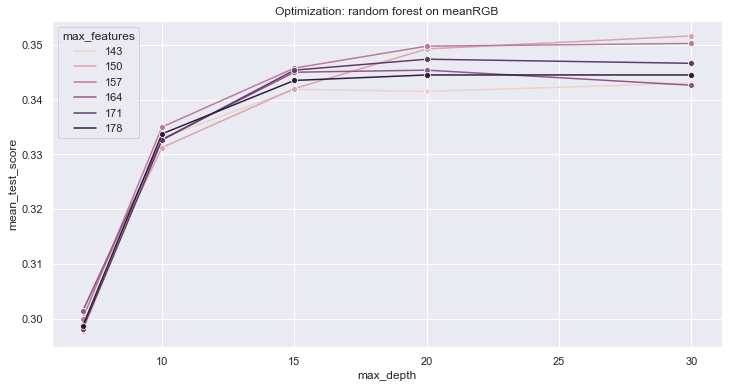

In [32]:
plt.figure(figsize = (12,6))
#sns.lineplot(x = 'max_depth', y='mean_test_score', data = grid_rf_optimization, hue = 'criterion', style='max_features', marker = 'o')
sns.lineplot(x = 'max_depth', y='mean_test_score', data = grid_rf_optimization, hue = 'max_features', marker = 'o')

plt.title("Optimization: random forest on meanRGB")

**Classification Report: macro & micro**

In [29]:
from sklearn.metrics import classification_report 

cr = classification_report(y_test, y_pred, output_dict = True)
cr.update({"accuracy": {"precision": None, "recall": None, "f1-score": cr["accuracy"], "support": cr['macro avg']['support']}})

micro_rf = pd.DataFrame(cr).transpose().reset_index().rename(columns={'index': 'prdtypecode'}).iloc[:-3,:]
macro_rf = pd.DataFrame(cr).transpose().reset_index().rename(columns={'index': 'metrics'}).iloc[-3:,:]

# display(micro_dt)
# display(macro_dt)

C:\Users\19rod\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\19rod\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\19rod\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          10       0.53      0.30      0.38        87
          40       0.31      0.14      0.19        65
          50       0.23      0.07      0.11        44
          60       0.67      0.09      0.16        22
        1140       0.25      0.05      0.08        63
        1160       0.60      0.66      0.63       102
        1180       0.00      0.00      0.00        17
        1280       0.11      0.09      0.10       108
        1281       0.33      0.02      0.04        43
        1300       0.28      0.28      0.28       109
        1301       0.00      0.00      0.00        26
        1302       0.38      0.05      0.09        61
        1320       0.27      0.13      0.18        75
        1560       0.30      0.34      0.32       111
        1920       0.60      0.66      0.63       101
        1940       1.00      0.09      0.17        11
        2060       0.30      0.34      0.32       133
        2220       0.50    

C:\Users\19rod\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\19rod\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\19rod\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Top classified cathegories**

In [33]:
micro_rf.sort_values(by = 'f1-score', ascending=False).head(7)

,prdtypecode,precision,recall,f1-score,support
14,1920,0.603604,0.663366,0.632075,101.0
5,1160,0.603604,0.656863,0.629108,102.0
25,2705,0.517241,0.652174,0.576923,69.0
23,2583,0.321364,0.778261,0.454892,230.0
21,2522,0.538462,0.375000,0.442105,112.0
18,2280,0.351351,0.575221,0.436242,113.0
19,2403,0.329545,0.500000,0.397260,116.0


## SVM.SVC model on pixels

In [ ]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

## estimator
svc_clf = svm.SVC() #kernel = 'poly', gamma = 0.01

## GridSearch
params = {'C' : [0.1,1,10],
         'kernel' : ['linear','rbf'],
          'gamma' : [0.01,0.1,1]}

grid_svc = GridSearchCV(estimator = svc_clf, param_grid = params, scoring = 'accuracy', n_jobs = -1, \
                          return_train_score=True) #verbose = 2

## training (timed)
t0 = time.time()

#svc_clf.fit(X_train, y_train)
grid_svc.fit(X_train, y_train)

t1 = time.time()
print("For %d observations, training time = %0.2f seconds" %(X_train.shape[0], (t1-t0) ) )

In [35]:
svc_clf.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

**Grid optimization evaluation**

In [ ]:
print(grid_rf_px.best_params_)

grid_rf_optimization = pd.DataFrame.from_dict(grid_rf_px.cv_results_).loc[:,['params', 'mean_test_score']]
print(grid_rf_optimization)

In [ ]:
grid_rf_optimization['max_features'] = [val['max_features'] for val in grid_rf_optimization['params']]
#grid_rf_optimization['criterion'] = [val['criterion'] for val in grid_rf_optimization['params']]
grid_rf_optimization['max_depth'] = [val['max_depth'] for val in grid_rf_optimization['params']]

grid_rf_optimization = grid_rf_optimization.drop('params', axis = 1)

grid_rf_optimization.head()

In [ ]:
plt.figure(figsize = (12,6))
#sns.lineplot(x = 'max_depth', y='mean_test_score', data = grid_rf_optimization, hue = 'criterion', style='max_features', marker = 'o')
sns.lineplot(x = 'max_depth', y='mean_test_score', data = grid_rf_optimization, hue = 'max_features', marker = 'o')

plt.title("Optimization: random forest on meanRGB")

**Classification Report: macro & micro**

In [ ]:
from sklearn.metrics import classification_report 

cr = classification_report(y_test, y_pred, output_dict = True)
cr.update({"accuracy": {"precision": None, "recall": None, "f1-score": cr["accuracy"], "support": cr['macro avg']['support']}})

micro_rf = pd.DataFrame(cr).transpose().reset_index().rename(columns={'index': 'prdtypecode'}).iloc[:-3,:]
macro_rf = pd.DataFrame(cr).transpose().reset_index().rename(columns={'index': 'metrics'}).iloc[-3:,:]

# display(micro_dt)
# display(macro_dt)

In [ ]:
print(classification_report(y_test, y_pred))

**Train-Test accuracy**

In [ ]:
svc_accuracy_train = svc_clf.score(X_train, y_train)
svc_accuracy_test = svc_clf.score(X_test, y_test)

# rf_accuracy_train = grid_rf_px.score(X_train, y_train)
# rf_accuracy_test = grid_rf_px.score(X_test, y_test)

print("Train set accuracy %0.3f" % svc_accuracy_train)
print("Test  set accuracy %0.3f" % svc_accuracy_test)

**Predictions**

In [ ]:
#y_pred = rf_clf_px.predict(X_test)
y_pred = grid_rf_px.predict(X_test)

cm = pd.crosstab(y_test, y_pred, rownames=['Reality'], colnames=['Predictions'])
print(cm.shape)
display(cm)


**Top classified cathegories**

In [ ]:
micro_rf.sort_values(by = 'f1-score', ascending=False).head(7)